# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

## plot the data

## define feature function

In [3]:
def feature_function(x, y, dim):
    # x -> data_train[:,0]
    # y -> data_train[:,1]
    first_column = np.ones(shape=(len(x),))
    last_column = y
    
    feature = first_column
    for i in range(1, dim+1):
        intermidiate_column = np.power(x, i)
        feature = np.c_[feature, intermidiate_column]

    feature = np.c_[feature, last_column]
    #print(feature.shape)
    return feature

In [4]:
feature_function(data_train[:,0], data_train[:,1],2).shape

(500, 4)

## define regression function based on the feature function

In [5]:
def regression_function(theta, feature):

    value = np.dot(feature, theta.T)
    
    return value

## define regularization function on the model parameters

In [6]:
def regularization_function(theta):

    value = np.dot(theta.T, theta)
    
    return value

## define sigmoid function

In [7]:
def sigmoid(z):
    
    # sigmoid function 
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [8]:
# Logistic regression function
def logistic_function(theta, feature):

    h = sigmoid(regression_function(theta, feature))
    
    return h

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [9]:
def compute_loss_feature(theta, feature, label, alpha):

    h = logistic_function(theta, feature)
    
    for i in range(len(h)):
        h[i] = h[i] - np.finfo(float).eps if h[i] >= 0.5 else h[i] + np.finfo(float).eps
    
    data_fidelity = (1 / len(h)) * np.sum((-label*np.log(h))-(1-label)*np.log(1-h))
    
    regularization = alpha / 2 * regularization_function(theta)
    
    loss = data_fidelity + regularization
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [10]:
def compute_gradient_feature(theta, feature, label, alpha):
    data_fidelity_grad = (1 / len(feature)) * np.dot(feature.T,  (logistic_function(theta, feature) - label)) 
    regularization_grad = alpha * theta
    
    gradient = data_fidelity_grad + regularization_grad
    
    return gradient

## compute the accuracy

In [11]:
def compute_accuracy(theta, feature, label):
    
    predict_label = []
    
    for i in logistic_function(theta, feature):
        if i >= 0.5 :
            predict_label.append(1)
        else :
            predict_label.append(0)
    
    accuracy = (np.array(predict_label) == label).sum() / len(label)

    return accuracy

## gradient descent for the model parameters $\theta$

In [12]:
num_iteration   = 100000
learning_rates   = [0.001, 0.003, 0.03, 0.01]
alphas           = [0.1, 0.01, 0.001, 0.0001]

In [13]:
test_dims = 10 # 1차~10차 함수
for dim in range(1, test_dims+1):
    for learning_rate in learning_rates :
        for alpha in alphas :
            print('%d dim | %f lr | %f alpha' %(dim, learning_rate, alpha), end= ' --> ')
            train_feature = feature_function(data_train[:,0], data_train[:,1], dim)
            train_label = data_train[:,2]

            test_feature = feature_function(data_test[:,0], data_test[:,1], dim)
            test_label = data_test[:,2]

            theta = np.zeros(dim+2)
            #print(train_feature.shape, test_feature.shape, theta.shape)
            #loss_iteration_train = np.zeros(num_iteration)
            #loss_iteration_test = np.zeros(num_iteration)

            #accuracy_iteration_train = np.zeros(num_iteration)
            #accuracy_iteration_test = np.zeros(num_iteration)

            for i in range(num_iteration):
                theta = theta - learning_rate * compute_gradient_feature(theta, train_feature, train_label, alpha)
                #train_loss = compute_loss_feature(theta, train_feature, train_label, alpha)
                #test_loss = compute_loss_feature(theta, test_feature, test_label, alpha)
                #train_accuracy = compute_accuracy(theta, train_feature, train_label)
                #test_accuracy = compute_accuracy(theta, test_feature, test_label)
            theta_optimal = theta
            train_accuracy = compute_accuracy(theta_optimal, train_feature, train_label)
            test_accuracy = compute_accuracy(theta_optimal, test_feature, test_label)
            print('train acc. :', train_accuracy, 'test acc. :', test_accuracy)


1 dim | 0.001000 lr | 0.100000 alpha --> train acc. : 0.818 test acc. : 0.824
1 dim | 0.001000 lr | 0.010000 alpha --> train acc. : 0.852 test acc. : 0.848
1 dim | 0.001000 lr | 0.001000 alpha --> train acc. : 0.848 test acc. : 0.85
1 dim | 0.001000 lr | 0.000100 alpha --> train acc. : 0.848 test acc. : 0.852
1 dim | 0.003000 lr | 0.100000 alpha --> train acc. : 0.818 test acc. : 0.824
1 dim | 0.003000 lr | 0.010000 alpha --> train acc. : 0.848 test acc. : 0.85
1 dim | 0.003000 lr | 0.001000 alpha --> train acc. : 0.848 test acc. : 0.85
1 dim | 0.003000 lr | 0.000100 alpha --> train acc. : 0.846 test acc. : 0.856
1 dim | 0.030000 lr | 0.100000 alpha --> train acc. : 0.818 test acc. : 0.824
1 dim | 0.030000 lr | 0.010000 alpha --> train acc. : 0.848 test acc. : 0.85
1 dim | 0.030000 lr | 0.001000 alpha --> train acc. : 0.848 test acc. : 0.854
1 dim | 0.030000 lr | 0.000100 alpha --> train acc. : 0.844 test acc. : 0.86
1 dim | 0.010000 lr | 0.100000 alpha --> train acc. : 0.818 test acc.

7 dim | 0.030000 lr | 0.001000 alpha --> train acc. : 0.918 test acc. : 0.926
7 dim | 0.030000 lr | 0.000100 alpha --> train acc. : 0.934 test acc. : 0.928
7 dim | 0.010000 lr | 0.100000 alpha --> train acc. : 0.862 test acc. : 0.854
7 dim | 0.010000 lr | 0.010000 alpha --> train acc. : 0.902 test acc. : 0.914
7 dim | 0.010000 lr | 0.001000 alpha --> train acc. : 0.914 test acc. : 0.926
7 dim | 0.010000 lr | 0.000100 alpha --> train acc. : 0.924 test acc. : 0.928
8 dim | 0.001000 lr | 0.100000 alpha --> train acc. : 0.866 test acc. : 0.864
8 dim | 0.001000 lr | 0.010000 alpha --> train acc. : 0.894 test acc. : 0.906
8 dim | 0.001000 lr | 0.001000 alpha --> train acc. : 0.898 test acc. : 0.904
8 dim | 0.001000 lr | 0.000100 alpha --> train acc. : 0.898 test acc. : 0.904
8 dim | 0.003000 lr | 0.100000 alpha --> train acc. : 0.866 test acc. : 0.864
8 dim | 0.003000 lr | 0.010000 alpha --> train acc. : 0.9 test acc. : 0.914
8 dim | 0.003000 lr | 0.001000 alpha --> train acc. : 0.902 test a

<ipython-input-7-24a634544443>:4: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


train acc. : 0.856 test acc. : 0.866
10 dim | 0.030000 lr | 0.000100 alpha --> train acc. : 0.89 test acc. : 0.866
10 dim | 0.010000 lr | 0.100000 alpha --> train acc. : 0.786 test acc. : 0.772
10 dim | 0.010000 lr | 0.010000 alpha --> train acc. : 0.902 test acc. : 0.884
10 dim | 0.010000 lr | 0.001000 alpha --> train acc. : 0.872 test acc. : 0.848
10 dim | 0.010000 lr | 0.000100 alpha --> train acc. : 0.894 test acc. : 0.904


In [14]:
num_iteration   = 100000
learning_rate   = 0.01
alpha           = 0.0001
dim = 4
theta = np.zeros(dim+2)
theta_iteration = np.zeros((num_iteration, theta.size))

loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [15]:
train_feature = feature_function(data_train[:,0], data_train[:,1], dim)
train_label = data_train[:,2]

test_feature = feature_function(data_test[:,0], data_test[:,1], dim)
test_label = data_test[:,2]

for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, train_feature, train_label, alpha)
    theta_iteration[i] = theta 
    
    train_loss = compute_loss_feature(theta, train_feature, train_label, alpha)
    loss_iteration_train[i] = train_loss
    
    test_loss = compute_loss_feature(theta, test_feature, test_label, alpha)
    loss_iteration_test[i] = test_loss
    
    train_accuracy = compute_accuracy(theta, train_feature, train_label)
    accuracy_iteration_train[i] = train_accuracy
    
    test_accuracy = compute_accuracy(theta, test_feature, test_label)
    accuracy_iteration_test[i] = test_accuracy
    
    if i%10000 == 0:
        print('[%d] loss(train) = %.5f, loss(test) = %.5f, accuracy(train) = %.5f, accuracy(test) = %.5f' %(i, train_loss, test_loss, train_accuracy, test_accuracy))
theta_optimal = theta

train_accuracy = compute_accuracy(theta_optimal, train_feature, train_label)
test_accuracy = compute_accuracy(theta_optimal, test_feature, test_label)
print('train acc. :', train_accuracy, 'test acc. :', test_accuracy)

[0] loss(train) = 0.63204, loss(test) = 0.63162, accuracy(train) = 0.70200, accuracy(test) = 0.68000
[10000] loss(train) = 0.26105, loss(test) = 0.27327, accuracy(train) = 0.89600, accuracy(test) = 0.89600
[20000] loss(train) = 0.22716, loss(test) = 0.23777, accuracy(train) = 0.90400, accuracy(test) = 0.91000
[30000] loss(train) = 0.21102, loss(test) = 0.22030, accuracy(train) = 0.91000, accuracy(test) = 0.92600
[40000] loss(train) = 0.20150, loss(test) = 0.20980, accuracy(train) = 0.91600, accuracy(test) = 0.92800
[50000] loss(train) = 0.19527, loss(test) = 0.20285, accuracy(train) = 0.92000, accuracy(test) = 0.92800
[60000] loss(train) = 0.19092, loss(test) = 0.19795, accuracy(train) = 0.92400, accuracy(test) = 0.93000
[70000] loss(train) = 0.18775, loss(test) = 0.19437, accuracy(train) = 0.92400, accuracy(test) = 0.92800
[80000] loss(train) = 0.18536, loss(test) = 0.19166, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[90000] loss(train) = 0.18352, loss(test) = 0.18956, accura

## compute accuracy of the classifiers

In [16]:
accuracy_train  = '%.5f' % compute_accuracy(theta_optimal, train_feature, train_label)
accuracy_test   = '%.5f' % compute_accuracy(theta_optimal, test_feature, test_label)
print('TRAIN : {0}, TEST : {1}'.format(accuracy_train, accuracy_test))

TRAIN : 0.92400, TEST : 0.93200


## plot the results

In [17]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    
    x = np.arange(0, len(loss_iteration_train))
    
    y_train = loss_iteration_train
    y_test = loss_iteration_test
    
    plt.plot(x,y_train,color = 'r',label = "train")
    plt.plot(x,y_test,color = 'b', label = "test")
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [18]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6)) # USE THIS VALUE for the size of the figure
    plt.title('accuracy')
    
    x = np.arange(0, len(accuracy_iteration_train))
    
    y_train = accuracy_iteration_train
    y_test = accuracy_iteration_test
    
    plt.plot(x,y_train,color = 'r',label = "train")
    plt.plot(x,y_test,color = 'b', label = "test")
    
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [19]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    
    data_train_0 = data_train[data_train[:,2] == 0][:,0:2]
    data_train_1 = data_train[data_train[:,2] == 1][:,0:2]

    data_test_0 = data_test[data_test[:,2] == 0][:,0:2]
    data_test_1 = data_test[data_test[:,2] == 1][:,0:2]
    
    
    ax1 = f.add_subplot(1, 2, 1)
    ax1.plot(data_train_0[:,0], data_train_0[:,1], '.', color = 'blue', label = 'class = 0')
    ax1.plot(data_train_1[:,0], data_train_1[:,1], '.', color = 'red', label = 'class = 1')
    ax1.set_title('train data')
    
    ax2 = f.add_subplot(1, 2, 2)
    ax2.plot(data_test_0[:,0], data_test_0[:,1], '.', color = 'blue', label = 'class = 0')
    ax2.plot(data_test_1[:,0], data_test_1[:,1], '.', color = 'red', label = 'class = 1')
    ax2.set_title('test data')
    
    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

In [20]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    x = np.arange(0, num_iteration)
    
    for i in range(theta_iteration.shape[1]) :
        thetaN = [theta for theta in theta_iteration.T[i]]
        rgb = np.random.rand(3) # random color values
        plt.plot(x, thetaN, color = rgb, label = r'$\theta_%d$'%i)
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

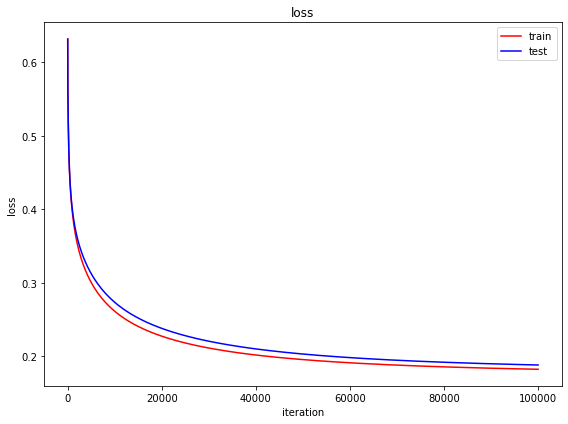

In [21]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

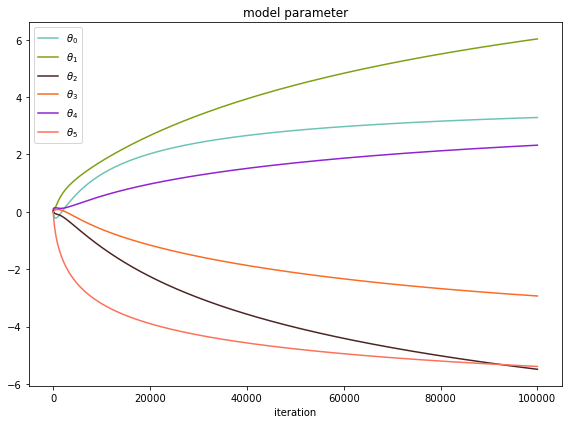

In [22]:
plot_model_parameter(theta_iteration)

In [23]:
print(max(data_train[:,0]),min(data_train[:,0]))
print(max(data_train[:,1]),min(data_train[:,1]))

print(max(data_test[:,0]),min(data_test[:,0]))
print(max(data_test[:,1]),min(data_test[:,1]))

2.821970973930761 -1.0606324872551616
1.8127132515773137 -0.49727537528245813
2.877073111167922 -1.0454351164163012
1.8498936009886164 -0.5453893551564277


In [24]:
def plot_classifier(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    # meshgrid
    x_value = np.arange(-1.5, 3, 0.01)
    y_value = np.arange(-0.7, 2, 0.01)
    xs, ys = np.meshgrid(x_value, y_value)
    
    
    z = theta[0] \
    + theta[1] * np.power(xs,1) \
    + theta[2] * np.power(xs,2) \
    + theta[3] * np.power(xs,3) \
    + theta[4] * np.power(xs,4) \
    + theta[5] * ys
    
    norm = colors.TwoSlopeNorm(vcenter=0)
    plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)
    plt.colorbar()

    # data plot
    data_0 = data[data[:,2] == 0][:,0:2]
    data_1 = data[data[:,2] == 1][:,0:2]
    plt.plot(data_0[:,0], data_0[:,1], '.', color = 'blue', label = 'class = 0')
    plt.plot(data_1[:,0], data_1[:,1], '.', color = 'red', label = 'class = 1')

    # linear regression function
    cs = plt.contour(xs, ys, z, levels=0, colors='k')
    
    plt.legend()

    plt.show()

<ipython-input-24-4fc188d17f4f>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


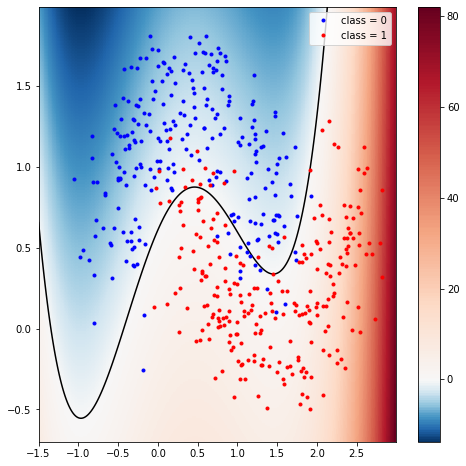

In [25]:
plot_classifier(data_train, theta_optimal)

<ipython-input-24-4fc188d17f4f>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


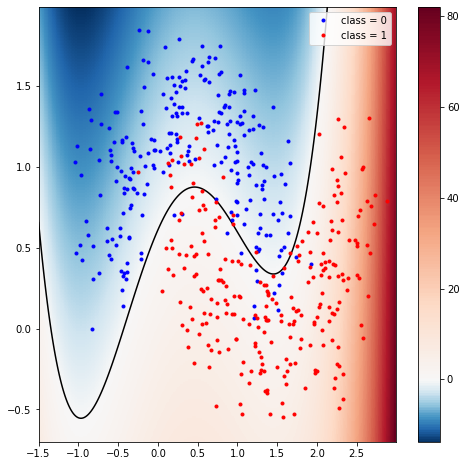

In [26]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

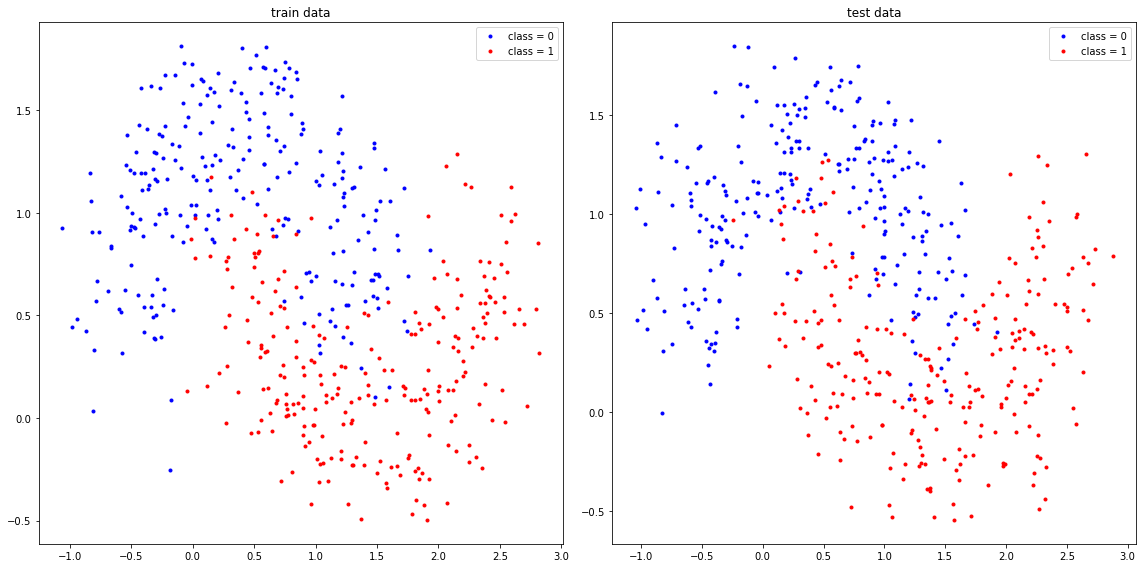

In [27]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

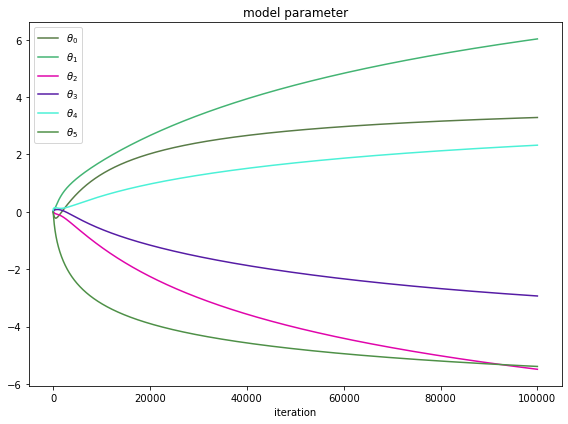

In [28]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

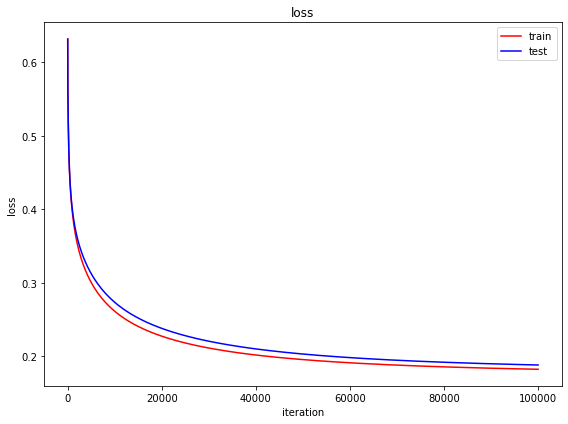

In [29]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

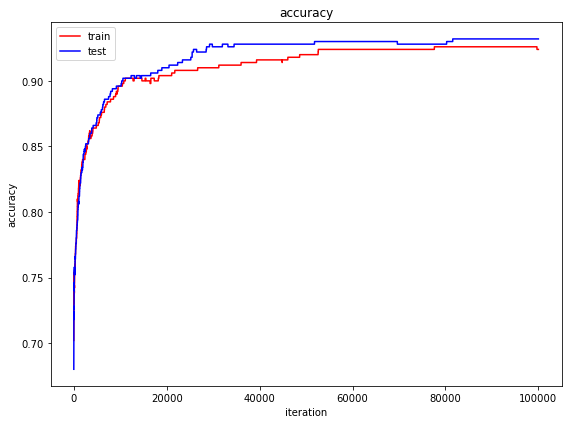

In [30]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

<ipython-input-24-4fc188d17f4f>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


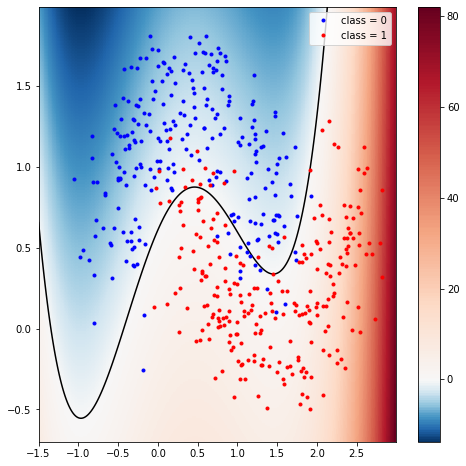

In [31]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

<ipython-input-24-4fc188d17f4f>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xs, ys, z, cmap='RdBu_r', norm=norm)


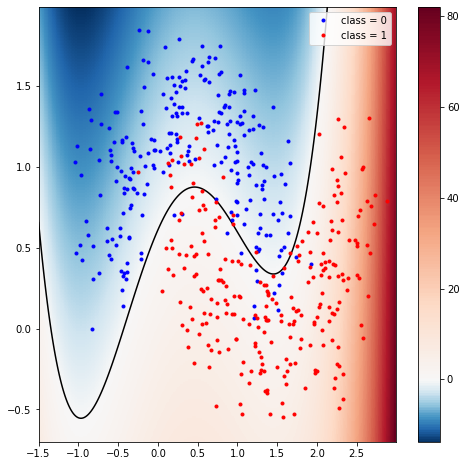

In [32]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [33]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.92400
accuracy(test) : 0.93200
